In [2]:
import os
import codecs


In [8]:
from WordCut import WordCut
import pandas as pd
wordcutter = WordCut()

rawdf = pd.read_csv('test.csv')
rawdf['tscut'] = rawdf.apply(lambda row: wordcutter.seg_sentence(row['reply']), axis = 1)




In [9]:
rawdf.head()

,reply,label,tscut
0,由于各城市相关政策有所不同，具体您所在当地是否有开展公积金贷款业务，以及相关业务规定，您可以...,贷款,城市 相关 政策 有所不同 公积金 贷款 业务 相关 业务 网点 个贷 部门 确认
1,我行贷款如您提交申请资料齐全审批大约15个工作日左右，因为中间涉及评估、办理抵押登记等环节，...,贷款,我行 贷款 提交 申请 资料齐全 审批 15 工作日 涉及 评估 办理 抵押 登记 环节 客...
2,若是我行贷款，如有消费，请您按时、足额在到期还款日之前还款。首先逾期会生成不良信用记录，影响...,贷款,我行 贷款 消费 请 足额 到期 还款 日 还款 逾期 生成 不良 信用 记录 影响 个人信...
3,若是招行转出，网上银行/手机银行转账汇款到账时间:同行转账:无论同城或异地，转入个人账户实时...,转账,招行 转 网上银行 手机 银行 转账 汇款 账 时间 同行 转账 同城 异地 转入 个人账户...
4,建议您选择正规渠道办理借款，如银行渠道；通过招行贷款，贷款金额较小（#万以下），如您已是招行...,信用卡,建议您 选择 正规渠道 办理 借款 银行 渠道 招行 贷款 贷款 金额 万 招行 用户 下载...


In [10]:
print("%d verbatim" % len(rawdf['tscut']))


4166 verbatim


In [48]:
### cluster test
import numpy as np
#from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline

stopwords = []
for line in open('stopwords.txt', encoding = 'utf-8'):
    stopwords.append(line.strip())
    
    
print("使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=40000,
                                 min_df=5, stop_words=stopwords,ngram_range=(1, 2),
                                 use_idf=True)

X = vectorizer.fit_transform(rawdf['tscut'])

# print("完成所耗费时间： %fs" % (time() - t0))
print("样本数量: %d, 特征数量: %d" % X.shape)
print('特征抽取完成！')

###############################################333
print("用LSA进行维度规约（降维）...")
    
#Vectorizer的结果被归一化，这使得KMeans表现为球形k均值（Spherical K-means）以获得更好的结果。 
#由于LSA / SVD结果并未标准化，我们必须重做标准化。   
svd = TruncatedSVD(15)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(X)
# print("完成所耗费时间： %fs" % (time() - t0))
explained_variance = svd.explained_variance_ratio_.sum()
print("SVD解释方差的step: {}%".format(int(explained_variance * 100)))
print('PCA文本特征抽取完成！')

#进行实质性的DBScan聚类
#db = DBSCAN(eps=0.2, min_samples=4).fit(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X) ##调整参数 min_samples 控制每个聚类最少有多少条
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

db.core_sample_indices_

labels = db.labels_
labels

clusterTitles = db.labels_
dbscandf = rawdf
dbscandf['cluster'] = clusterTitles

##看看簇群序号为0的文章的标题有哪些，通过这个能看出聚类的实际效果如何
#dbscandf[dbscandf['cluster'] == 0]['tags'].head(20)  #簇群tag为0的title名称
#
#
##看看簇群序号为20的文章的标题有哪些，通过这个能看出聚类的实际效果如何
#dbscandf[dbscandf['cluster'] == 20]['tags'].head(20)  #簇群tag为20的title名称

# 聚类数及噪点计算
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('聚类数：',n_clusters_)
print('噪点数：',n_noise_)


使用稀疏向量（Sparse Vectorizer）从训练集中抽取特征


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


样本数量: 4166, 特征数量: 5720
特征抽取完成！
用LSA进行维度规约（降维）...
SVD解释方差的step: 12%
PCA文本特征抽取完成！
聚类数： 24
噪点数： 1660


In [49]:
###############################
## 整理数据 show top 3 keywords of each cluster
from jieba import analyse
# 引入TF-IDF关键词抽取接口
tfidf = analyse.extract_tags
gencode = []
print("tfidf")
for i in range(n_clusters_):
    text = '，'.join(dbscandf[dbscandf['cluster'] == i]['reply'])
    keywordsN = tfidf(text,topK=3)
    print(keywordsN)

print("text trank")
ttrank = analyse.textrank
for i in range(n_clusters_):
    text = '，'.join(dbscandf[dbscandf['cluster'] == i]['reply'])
    keywordsN = ttrank(text,topK=3)
    print(keywordsN)

tfidf
['公积金', '贷款', '住房']
['信用卡', '申请', '还款']
['贷款', '招行', '申请']
['汇率', '现钞', '计算结果']
['理财', '理财产品', '投资']
['申请', '贷款', '我要']
['贷款', '年利率', '申请']
['贷款', '申请', '证明']
['人民币', '日元', '##']
['汇率', '实时', '外汇']
['闪电', '我行', '审批']
['一卡通', '银行', '招行']
['利息', '还款', '本金']
['记录', '还款', '征信']
['还款', '贷后', '经办']
['贷款', '抵押', '可以']
['贷款', '银行', '借款人']
['招行', '计算器', '主页']
['顶顶顶', '可以', '万叁']
['免息', '分期', '招行']
['贷款', '####', '公积金']
['贷款', '申请', '招行']
['贷款', '办理', '招行']
['退款', '商户', '有快有慢']
text trank
['公积金', '贷款', '住房']
['信用卡', '申请', '还款']
['贷款', '申请', '招行']
['汇率', '计算', '外汇']
['理财', '投资', '基金']
['申请', '贷款', '招行']
['贷款', '申请', '招行']
['贷款', '证明', '申请']
['人民币', '日元', '兑换']
['汇率', '外汇', '点击']
['审批', '闪电', '贷款']
['银行', '办理', '招行']
['利息', '贷款', '还款']
['记录', '还款', '征信']
['还款', '提前', '办理']
['贷款', '抵押', '公司']
['银行', '贷款', '证明']
['招行', '计算器', '建议']
['顶顶顶', '序列号', '上梁']
['商品', '招行', '购买']
['贷款', '城市', '公积金']
['贷款', '申请', '信息']
['贷款', '办理', '招行']
['退款', '商户', '联系']


In [50]:
df_pivot = pd.pivot_table(dbscandf,index=['cluster'], values = ['reply'],aggfunc= 'count')  
df_pivot

,reply
cluster,
-1,1660
0,104
1,480
2,42
3,102
4,423
5,94
6,62
7,156


ss0.png


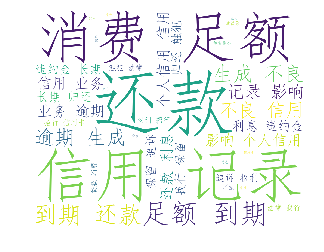

ss1.png


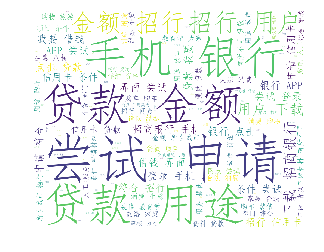

ss2.png


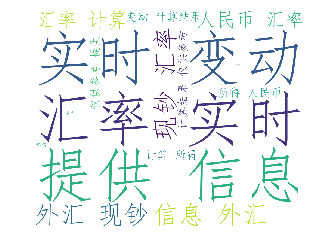

ss3.png


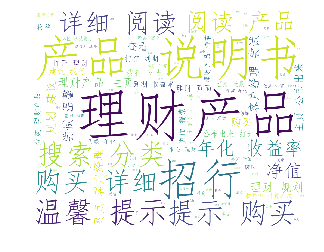

ss4.png


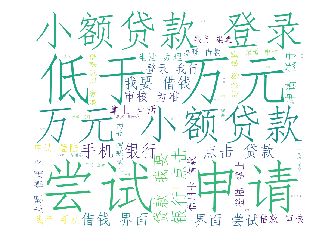

ss5.png


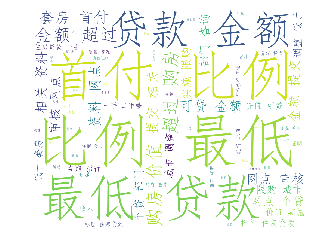

ss6.png


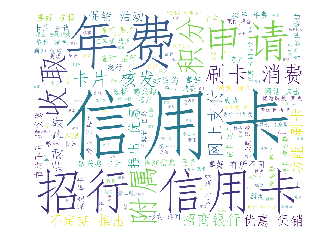

ss7.png


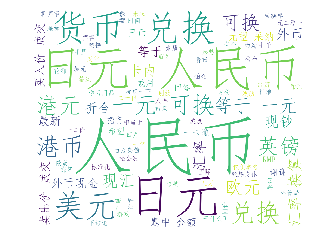

ss8.png


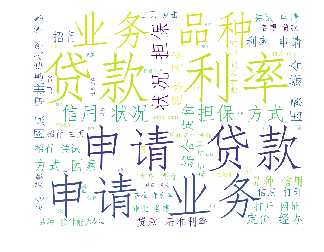

ss9.png


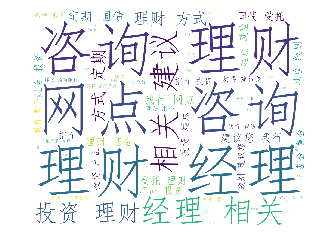

ss10.png


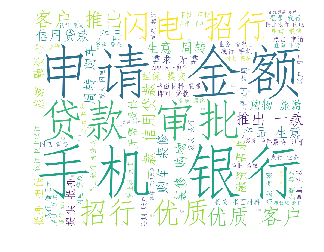

ss11.png


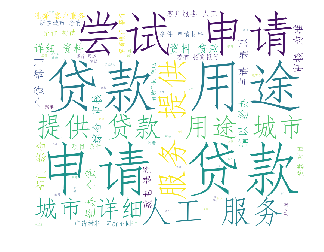

ss12.png


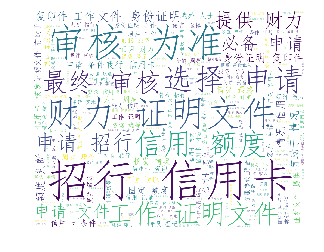

ss13.png


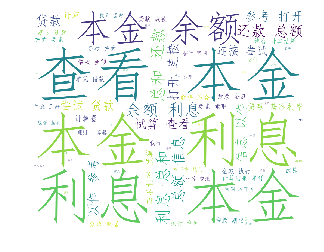

ss14.png


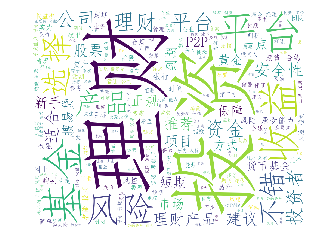

ss15.png


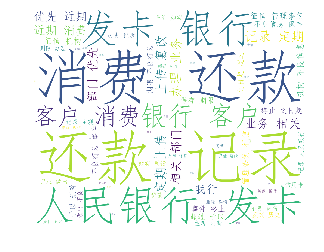

ss16.png


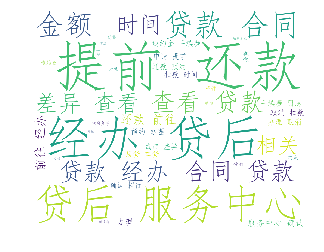

ss17.png


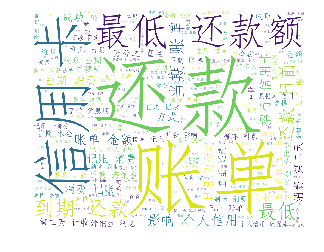

ss18.png


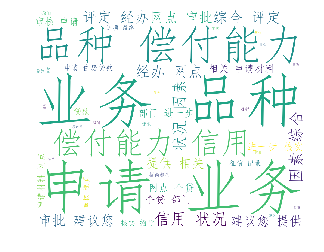

ss19.png


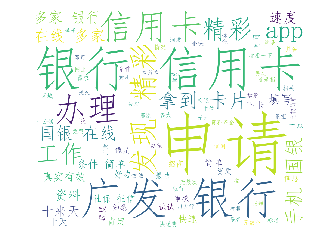

ss20.png


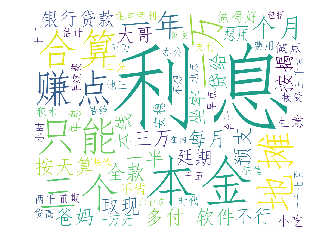

ss21.png


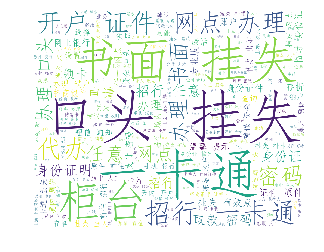

ss22.png


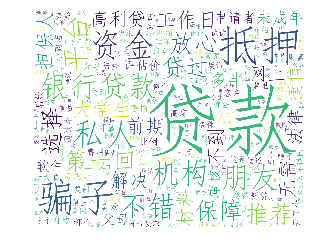

ss23.png


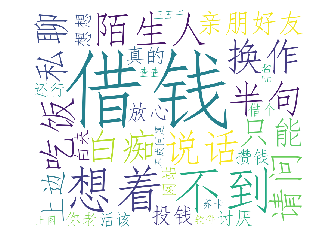

ss24.png


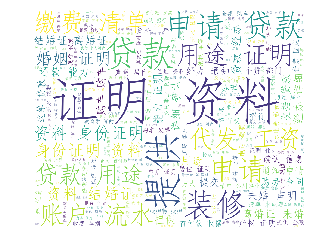

ss25.png


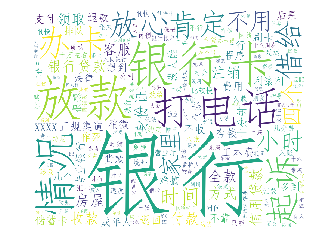

ss26.png


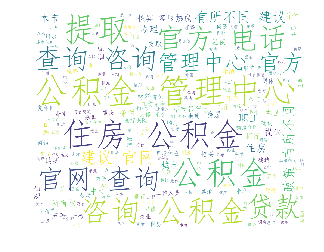

ss27.png


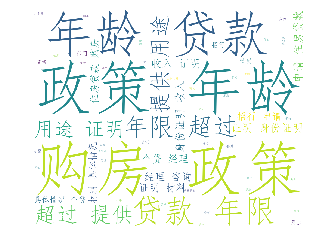

ss28.png


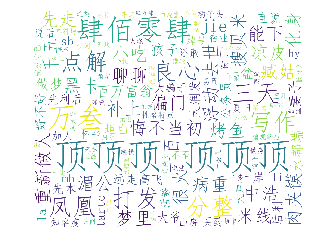

ss29.png


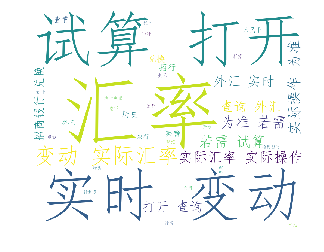

ss30.png


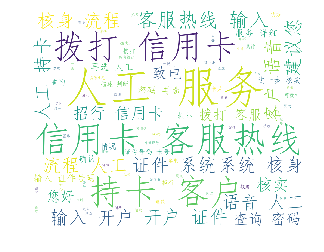

ss31.png


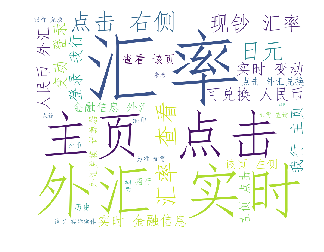

ss32.png


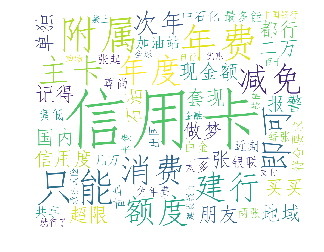

ss33.png


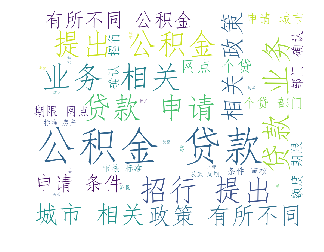

ss34.png


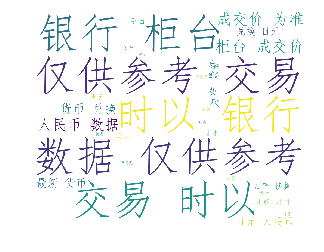

ss35.png


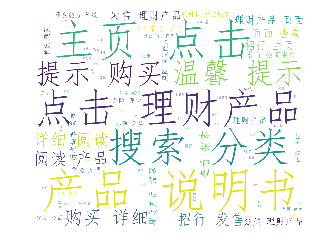

ss36.png


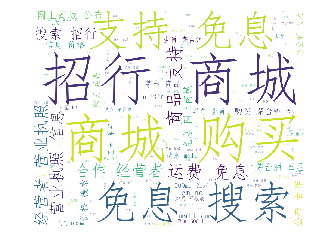

ss37.png


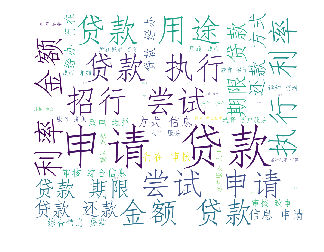

ss38.png


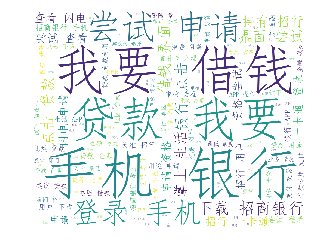

ss39.png


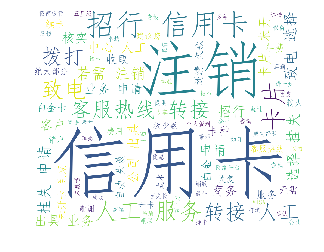

In [36]:
## use word cloud to check clusters
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# string = 'Importance of relative word frequencies for font-size. With relative_scaling=0, only word-ranks are considered. With relative_scaling=1, a word that is twice as frequent will have twice the size. If you want to consider the word frequencies and not only their rank, relative_scaling around .5 often looks good.'
for i in range(n_clusters_):
    string = ' '.join(dbscandf[dbscandf['cluster'] == i]['tscut'])
    font = r'C:\Windows\Fonts\simfang.TTF'
    wc = WordCloud(font_path=font, #如果是中文必须要添加这个，否则会显示成框框
                   background_color='white',
                   width=1000,
                   height=800,
                   ).generate(string)
    picname = 'ss' + str(i) + '.png'
    print(picname)
    wc.to_file(picname) #保存图片
    plt.imshow(wc)  #用plt显示图片
    plt.axis('off') #不显示坐标轴
    plt.show() #显示图片


In [47]:
df_pivot = pd.pivot_table(dbscandf,index=['cluster'], values = ['reply'],aggfunc= 'count')  
df_pivot

,reply
cluster,
-1,2807
0,12
1,22
2,102
3,21
4,31
5,16
6,19
7,116


In [ ]:
def splitList(phrases):
    ls = phrases.split(' ')
    if '' in ls:
        ls.remove('')
    return ls

corpus = list(dbscandf['tscut'].apply(lambda i: splitList(i)))
corpus[1:3]


In [ ]:
zidian = corpora.Dictionary(corpus)
doc_vec = [zidian.doc2bow(text) for text in corpus]
tfidf = models.TfidfModel(doc_vec)
tfidf_vectors = tfidf[doc_vec]
lsi = models.LsiModel(tfidf_vectors, id2word=zidian, num_topics=numtopics)
lsi_vec = lsi[tfidf_vectors]


In [62]:
from sklearn.utils import shuffle

rndf = shuffle(rawdf)



1545    建议您 选择 正规渠道 办 理财 银行 渠道 贵金属 投资 品种 我行 招财 金 业务 实 ...
367     招行 柜台 自助 设备 分布 营业时间 电话 交通 参考 请 参考 建议您 先 电话 支行 ...
215     办理 借款 建议您 选择 正规渠道 办理 银行 渠道 招行 贷款 贷款 金额 万 招行 用户...
3109                            利息 0.3 请问 年息 超过 0.26 高利贷 
1746    请 打开 连接 尝试 贷款 基准利率 试算 所在城市 若有 招行 招行 尝试 申请 贷款 申...
Name: tscut, dtype: object

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

train_label = rndf['label'][0:2500]
train_set = rndf['tscut'][0:2500]
test_label = rndf['label'][2501:4000]
test_set = rndf['tscut'][2501:4000]
# rndf.head()
# 计算tf-idf
corpus_set = train_set + test_set # 全量计算tf-idf
print("length of corpus is: " + str(len(corpus_set)))
#vectorizer = CountVectorizer(min_df=1e-2) # drop df < 1e-5,去低频词
#vectorizer.fit_transform(corpus_set).values.astype('U')
#transformer = TfidfTransformer()
# tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus_set).values.astype('U'))
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(corpus_set.values.astype('U'))

words = v.get_feature_names()
print("how many words: {0}".format(len(words)))
#print("tf-idf shape: ({0},{1})".format(tfidf.shape[0], tfidf.shape[1]))

length of corpus is: 3999
how many words: 1


In [88]:
from sklearn import preprocessing

# encode label
corpus_label = train_label + test_label
encoder = preprocessing.LabelEncoder()
corpus_encode_label = encoder.fit_transform(corpus_label)
train_label = corpus_encode_label[:50000]
val_label = corpus_encode_label[50000:55000]
test_label = corpus_encode_label[55000:]
# get tf-idf dataset
train_set = tfidf[:50000]
val_set = tfidf[50000:55000]
test_set = tfidf[55000:]

TypeError: 'method' object is not subscriptable

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix

# LogisticRegression classiy model
lr_model = LogisticRegression()
lr_model.fit(train_set, train_label)
print("val mean accuracy: {0}".format(lr_model.score(val_set, val_label)))
y_pred = lr_model.predict(test_set)
print(classification_report(test_label, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: '一家 民宿 海外 房源 海外 用户 支持 一家 民宿 支持 支付宝 公众 号 visa 信用卡 多种 支付 方式 '

In [7]:
import dash_core_components as dcc
#dcc.Input(placeholder = "Enter a value...", type='text', value='')
dcc.Checklist(
    options=[
        {'label':'NEW Yock C','value':'NYC'},
        {'label':'MorTeL','value':'MTL'},
        {'label':'San Fra','value':'SF'}
    ],
    value=['MTL','SF']
)

Checklist(options=[{'label': 'NEW Yock C', 'value': 'NYC'}, {'label': 'MorTeL', 'value': 'MTL'}, {'label': 'San Fra', 'value': 'SF'}], value=['MTL', 'SF'])